In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Project Requirements/Datasets/BTP/Book1.xlsx")
df1.head()

,Avg_So,PV
0,0.270,0
1,0.245,3
2,0.241,6
3,0.240,9
4,0.235,12


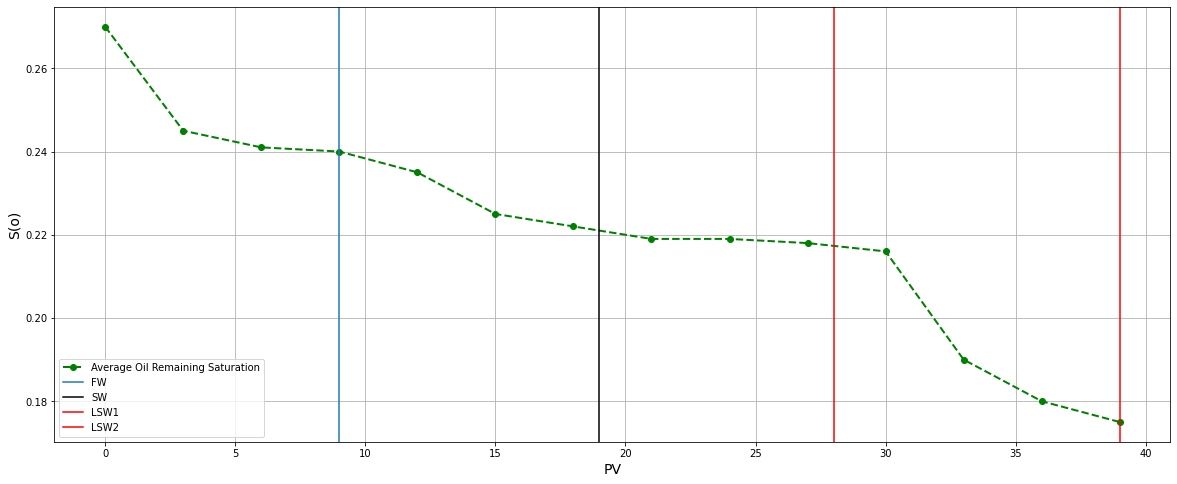

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df1.PV, df1.Avg_So, 'go--', linewidth=2, markersize=6, label='Average Oil Remaining Saturation')
plt.axvline(x=9, label='FW')
plt.axvline(x=19, label='SW', color="black")
plt.axvline(x=28, label='LSW1', color='red')
plt.axvline(x=39, label='LSW2', color='red')
plt.xlabel("PV",fontsize=14)
plt.ylabel("S(o)", fontsize=14)
plt.legend()
plt.grid(True)

2

In [ ]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [ ]:
def var2(K_rw):
  Mu_w = 1
  Mu_o = 20
  K_ro = np.linspace(0.2,0.8,500)
  Lambda_o = K_ro/Mu_o
  Lambda_w = K_rw/Mu_w
  F_o = Lambda_o/(Lambda_o + Lambda_w)
  plt.figure(figsize = (20,8))
  plt.plot(K_ro, F_o, linewidth=4)
 
  y_max = F_o[np.where(K_ro == 0.8)]
  plt.axhline(y_max,linewidth=2,color='red')
  plt.ylim(0,0.25)

  plt.xlabel('Relative Oil Permeability')
  plt.ylabel('Oil fractional flow')

  plt.title('Flow Profile')
  plt.grid(True)
  return K_ro,F_o

In [ ]:
w = interactive(var2, K_rw = (0.2,0.8) )
display(w)

interactive(children=(FloatSlider(value=0.5, description='K_rw', max=0.8, min=0.2), Output()), _dom_classes=('…

3

In [ ]:
def var3(Swirr, u_o):
  u_w = 1
  Sw = np.linspace(0.2,0.9,500)
  So = 1-Sw
  So_ = So/(1-Swirr)
  Sw_ = (Sw-Swirr)/(1-Swirr)
  #Wyllie – Gardner Correlations
  Krw = (So_)**4
  Kro = ((1-So_)**2)/(1-(Sw_**2))
  ##
  Fw = 1/(1+((Kro*u_w)/(Krw*u_o)))  
  plt.figure(figsize = (20,8))
  plt.plot(Sw, Fw, linewidth=4, color='blue')
  plt.plot(So, Fw, linewidth=4, color='orange')

  plt.xlabel('Saturation Sw/So')
  plt.ylabel('Frational flow')

  plt.title('Flow Profile')
  plt.grid(True)
  return Sw,Fw

In [ ]:
x = interactive(var3, Swirr = (0,0.2), u_o = (0,40) )
display(x)

In [ ]:
def var4(Swirr):
  u_w = 1
  Sw = np.linspace(0.2,0.73,500)
  So = 1-Sw
  So_ = So/(1-Swirr)
  Sw_ = (Sw-Swirr)/(1-Swirr)
  Krw = (So_)**4
  Kro = ((1-So_)**2)/(1-(Sw_**2))
  plt.figure(figsize = (20,8))
  plt.plot(Sw, Kro, linewidth=4, color='orange')
  plt.plot(Sw, Krw, linewidth=4, color='blue')
  

  plt.xlabel('Water Saturation Sw')
  plt.ylabel('Relative Permeability')

  plt.title('Flow Profile')
  plt.grid(True)
  return Sw,Kro

display(interactive(var4, Swirr = (0,0.2) ))


interactive(children=(FloatSlider(value=0.1, description='Swirr', max=0.2), Output()), _dom_classes=('widget-i…

4

In [ ]:
df2 = pd.read_excel("/content/drive/MyDrive/Project Requirements/Datasets/BTP/Book2.xlsx")
df2.head()

,Core_No,brine,IOIP
0,1,FW2,83.06
1,1,FW3,89.60
2,1,LS5,92.28
3,1,LS6,94.21
4,1,LS6,94.21


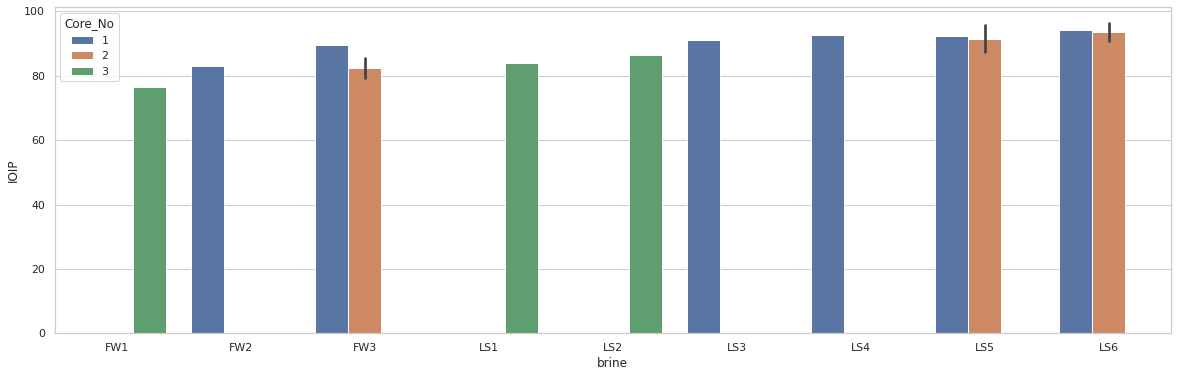

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize = (20,6))
ax = sns.barplot(x=df2.brine, y=df2.IOIP, hue=df2.Core_No, data=df2, estimator=np.mean, order=["FW1", "FW2", "FW3", "LS1", "LS2", "LS3", "LS4", "LS5", "LS6"])